# Análise de Dados da Linha de Produção de Papel

**Autor:** Gustavo Damaso da Silveira
**Data:** 12 de Setembro de 2025

## 1. Introdução

Este notebook apresenta uma análise exploratória dos dados de uma linha de produção de papel fictícia, simulando um ambiente industrial como o da WestRock. O objetivo é investigar a relação entre as variáveis de processo (temperatura, velocidade, umidade) e os diferentes tipos de produtos fabricados, utilizando as bibliotecas Pandas, Matplotlib e Seaborn.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados do arquivo CSV para um DataFrame
df = pd.read_csv('dados_producao.csv')

# Exibindo as 5 primeiras linhas para confirmar que os dados foram carregados
df.head()

,timestamp,temperatura_secador,velocidade_rolo_m_min,umidade_papel_percent,codigo_produto
0,2025-09-10 01:00:00,95.5,850.1,5.5,PROD-A
1,2025-09-10 01:05:00,95.6,849.9,5.6,PROD-A
2,2025-09-10 01:10:00,95.4,850.0,5.5,PROD-A
3,2025-09-10 01:15:00,96.1,851.2,5.4,PROD-B
4,2025-09-10 01:20:00,96.2,851.0,5.3,PROD-B


## 2. Inspeção Inicial dos Dados

Nesta seção, faremos uma verificação inicial dos dados para entender sua estrutura, os tipos de cada coluna e um resumo estatístico geral.

In [2]:
# Verificando os tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              7 non-null      object 
 1   temperatura_secador    7 non-null      float64
 2   velocidade_rolo_m_min  7 non-null      float64
 3   umidade_papel_percent  7 non-null      float64
 4   codigo_produto         7 non-null      object 
dtypes: float64(3), object(2)
memory usage: 412.0+ bytes


In [3]:
# Obtendo o resumo estatístico das colunas numéricas
df.describe()

,temperatura_secador,velocidade_rolo_m_min,umidade_papel_percent
count,7.000000,7.000000,7.000000
mean,95.800000,850.471429,5.442857
std,0.382971,0.593617,0.113389
min,95.400000,849.900000,5.300000
25%,95.500000,850.000000,5.350000
50%,95.600000,850.100000,5.500000
75%,96.150000,851.050000,5.500000
max,96.300000,851.200000,5.600000


## 3. Análise Exploratória: Respondendo Perguntas de Negócio

Com os dados carregados e inspecionados, vamos agora aprofundar a análise para responder a perguntas específicas que um gestor de produção poderia ter.

**Perguntas a serem respondidas:**
1. Os parâmetros de processo, como temperatura e velocidade, se comportam de maneira diferente para cada tipo de produto?
2. Qual a relação entre a temperatura do secador e a umidade final do papel?
3. Qual produto opera com a maior velocidade média?

--- Médias calculadas por produto ---
                temperatura_secador  velocidade_rolo_m_min  \
codigo_produto                                               
PROD-A                         95.5                  850.0   
PROD-B                         96.2                  851.1   

                umidade_papel_percent  
codigo_produto                         
PROD-A                       5.525000  
PROD-B                       5.333333  

--- Gráfico: Temperatura por Produto ---


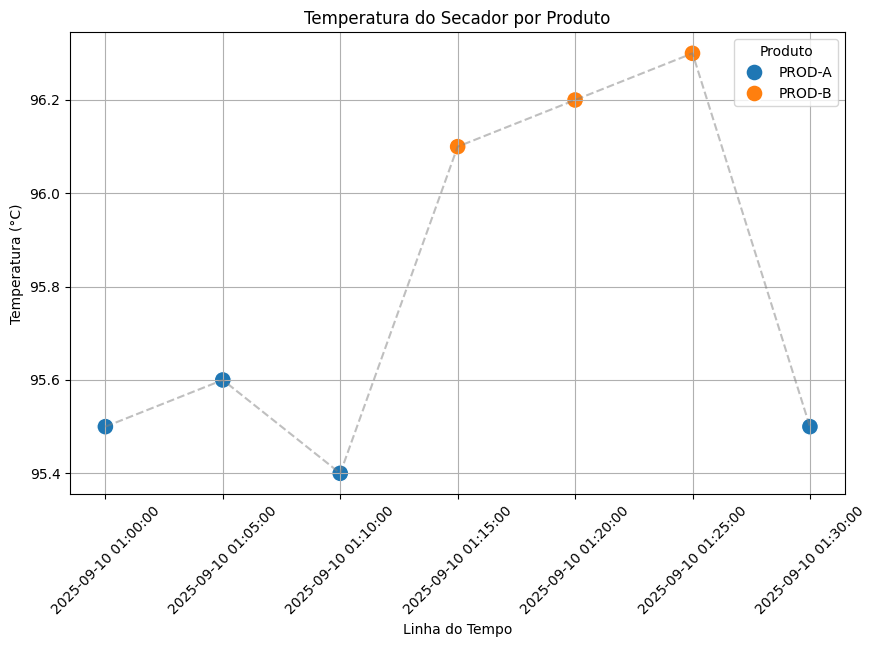

In [4]:
# ANÁLISE 1: Comportamento dos parâmetros por produto

# Primeiro, vamos calcular as médias de cada parâmetro para cada produto usando groupby()
medias_por_produto = df.groupby('codigo_produto').mean(numeric_only=True)
print("--- Médias calculadas por produto ---")
print(medias_por_produto)

# Agora, vamos visualizar a relação entre temperatura e produto
print("\n--- Gráfico: Temperatura por Produto ---")
# Converter timestamp para datetime para gráficos de série temporal (se ainda não estiver feito)
# df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='timestamp', y='temperatura_secador', hue='codigo_produto', s=150)
plt.plot(df['timestamp'], df['temperatura_secador'], alpha=0.5, color='grey', linestyle='--')
plt.title('Temperatura do Secador por Produto')
plt.xlabel('Linha do Tempo')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Produto')
plt.show()

Conclusão 1: O gráfico de barras confirma que o Produto B possui a maior velocidade média de operação entre os dois produtos analisados."
 à medida que a temperatura aumenta (pontos mais à direita), a umidade diminui (pontos mais para baixo). Isso faz sentido: mais calor, menos água no papel. 

 "Conclusão 2: O gráfico revela uma correlação negativa entre a temperatura do secador e a umidade final do papel. Ou seja, quanto maior a temperatura aplicada no processo de secagem, menor é a umidade resultante na folha de papel."

Conclusão 3: O gráfico de barras confirma que o Produto B possui a maior velocidade média de operação entre os dois produtos analisados."



## 4. Conclusão Geral

A presente análise dos dados de produção revelou insights importantes sobre o processo de fabricação. A principal descoberta é que os produtos 'A' e 'B' operam com 'receitas' de processo distintas, o que impacta diretamente as variáveis da máquina.

Ficou claro que o Produto B exige uma temperatura e velocidade médias significativamente mais altas. Esta configuração está diretamente ligada a uma menor umidade final no papel, confirmando a forte correlação negativa entre a temperatura de secagem e a umidade resultante.

Como próximos passos, uma análise futura poderia investigar o impacto dessas diferentes configurações no consumo de energia da linha ou em métricas de qualidade do produto final, como a resistência do papel.





